In [2]:
%%capture
!pip install kornia

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

# Introduction

In [4]:
%%capture
!wget https://github.com/kornia/data/raw/main/arturito.jpg

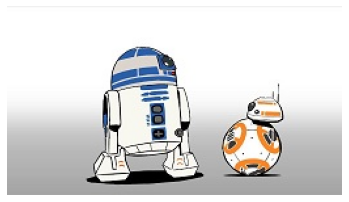

In [5]:
img_bgr: np.array = cv2.imread('arturito.jpg')  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.axis('off');

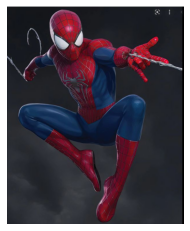

In [29]:
img_bgr: np.array = cv2.imread('spiderman.JPG')  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb); plt.axis('off');

In [30]:
x_bgr: torch.tensor = K.image_to_tensor(img_bgr)  # CxHxW / torch.uint8
x_bgr = x_bgr.unsqueeze(0)  # 1xCxHxW
print(f"convert from '{img_bgr.shape}' to '{x_bgr.shape}'")

convert from '(754, 611, 3)' to 'torch.Size([1, 3, 754, 611])'


In [31]:
img_bgr: np.array = K.tensor_to_image(x_bgr)

In [32]:
x_rgb: torch.tensor = K.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8

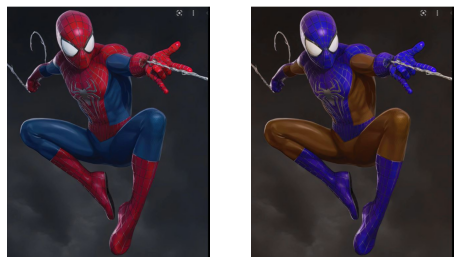

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(img_rgb)

axs[1].axis('off')
axs[1].imshow(img_bgr)

plt.show()

# Color space conversion

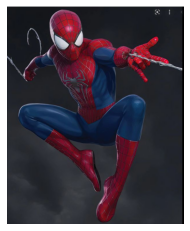

In [60]:
# convert the numpy array to torch
x_bgr: torch.Tensor = K.image_to_tensor(img_bgr)

# to BGR
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

# convert back to numpy and visualize
img_np: np.array = K.tensor_to_image(x_rgb)
plt.imshow(img_np); plt.axis('off');

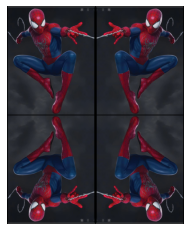

In [43]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = K.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# create a batch of images
xb_rgb = torch.stack([x_rgb, K.geometry.hflip(x_rgb), K.geometry.vflip(x_rgb), K.geometry.rot180(x_rgb)])
imshow(xb_rgb)

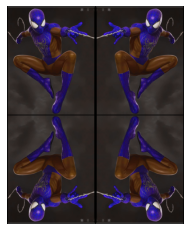

In [45]:
# convert to BGR
xb_bgr = K.color.bgr_to_rgb(xb_rgb)
imshow(xb_bgr)

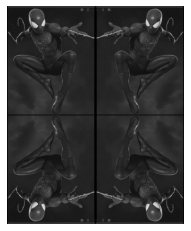

In [46]:
# convert to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = K.color.rgb_to_grayscale(xb_rgb.float() / 255.)
imshow(xb_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


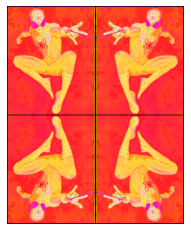

In [47]:
# convert to HSV
xb_hsv = K.color.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv)

# Image Enhancment

In [95]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

In [96]:
img_bgr: np.ndarray = cv2.imread('spiderman.JPG', cv2.IMREAD_COLOR)

In [97]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

In [98]:
x_rgb = x_rgb.expand(4, -1, -1, -1)  # 4xCxHxW
x_rgb = x_rgb.float() / 255.0

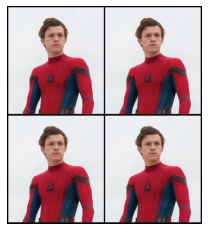

In [99]:
imshow(x_rgb)

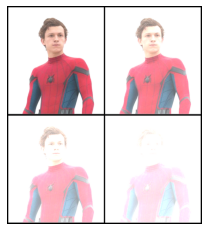

In [100]:
x_out: torch.Tensor = K.enhance.adjust_brightness(
    x_rgb, torch.linspace(0.2, 0.8, 4))
imshow(x_out)

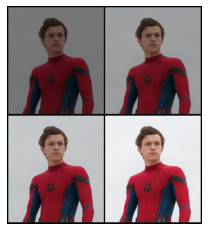

In [101]:
#Adjust Contrast
x_out: torch.Tensor = K.enhance.adjust_contrast(
    x_rgb, torch.linspace(0.5, 1., 4))
imshow(x_out)

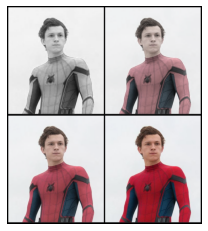

In [102]:
#adjust saturation
x_out: torch.Tensor = K.enhance.adjust_saturation(
    x_rgb, torch.linspace(0., 1., 4))
imshow(x_out)

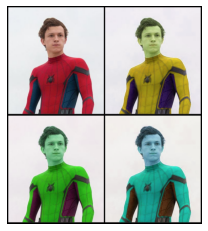

In [103]:
#Adjust Hue
x_out: torch.Tensor = K.enhance.adjust_hue(
    x_rgb, torch.linspace(0., 3.14159, 4))
imshow(x_out)

# Filtering Operators

In [88]:
img_bgr: np.ndarray = cv2.imread('spiderman.JPG', cv2.IMREAD_COLOR)

In [89]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

In [90]:
def imshow(input: torch.Tensor):
    if input.shape != x_rgb.shape:
        input = K.geometry.resize(input, size=(x_rgb.shape[-2:]))
    out = torch.cat([x_rgb, input], dim=-1)
    out = torchvision.utils.make_grid(out, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

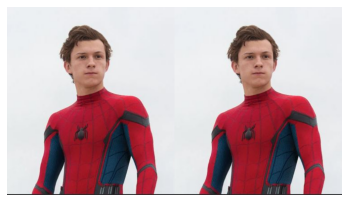

In [91]:
imshow(x_rgb)

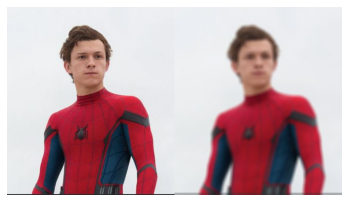

In [92]:
#Box Blur
x_blur: torch.Tensor = K.filters.box_blur(x_rgb, (9, 9))
imshow(x_blur)

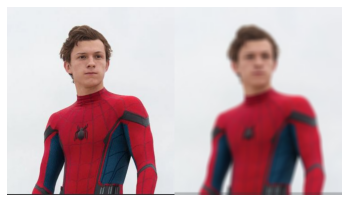

In [93]:
#Gaussian Blur
x_blur: torch.Tensor = K.filters.gaussian_blur2d(x_rgb, (11, 11), (11.0, 11.0))
imshow(x_blur)

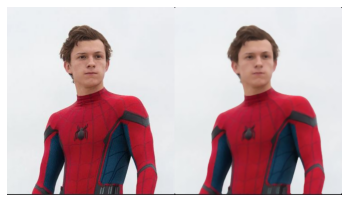

In [94]:
#Median Blur
x_blur: torch.Tensor = K.filters.median_blur(x_rgb, (5, 5))
imshow(x_blur)

# Edge Detection

In [78]:
img_bgr: np.ndarray = cv2.imread('doraemon.png', cv2.IMREAD_COLOR)

In [79]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

In [72]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

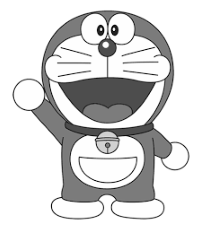

In [80]:
imshow(x_gray)

1st order derivates

In [81]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

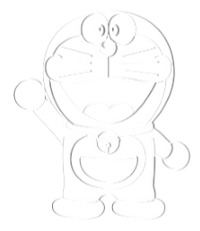

In [82]:
# Show first derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

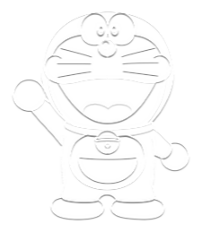

In [83]:
# Show first derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

2nd order derivatives

In [84]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

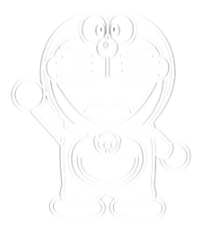

In [85]:
# Show second derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

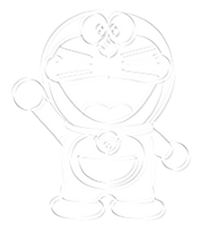

In [86]:
# Show second derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

Canny edges

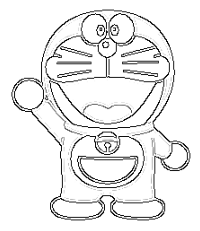

In [87]:
x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1. - x_laplacian.clamp(0., 1.))

# Morphological Operators

In [106]:
img = cv2.imread("spiderman.JPG") # Download Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Define RGB

device = 'cpu' # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0],[1, 1, 1],[0, 1, 0]]).to(device)

# to torch.tensor
img_t = K.image_to_tensor(img, keepdim=False)
img_t = img_t.float() / 255.

In [110]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_morph_image(tensor):

  # kornia.tensor_to_image
  image = K.tensor_to_image(tensor.squeeze(0)) # Tensor to image

  # Plot before-after
  rcParams['figure.figsize'] = 10 ,10
  fig, ax = plt.subplots(1,2)
  ax[0].axis('off')
  ax[0].imshow(img)
  ax[1].axis('off')
  ax[1].imshow(image)

Dilation

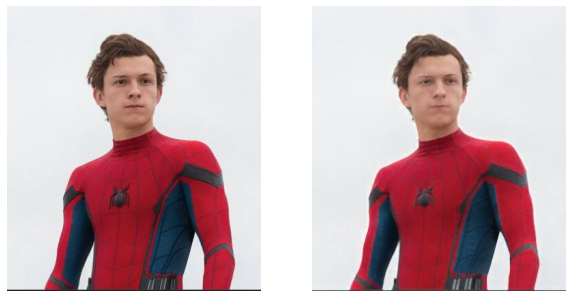

In [111]:
from kornia import morphology as morph

dilated_image = morph.dilation(img_t, kernel) # Dilation
plot_morph_image(dilated_image) # Plot

Erosion

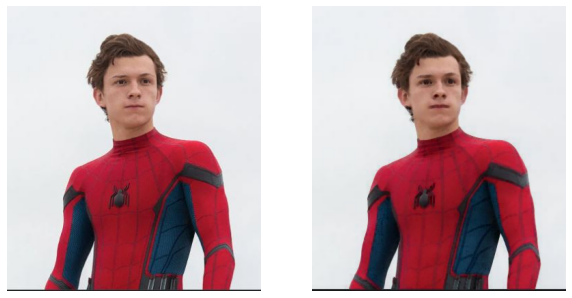

In [112]:
eroded_image = morph.erosion(img_t, kernel) # Erosion
plot_morph_image(eroded_image) # Plot

Morphological Gradient

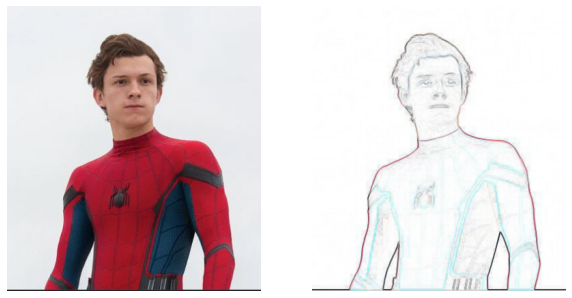

In [113]:
graded_image = morph.gradient(img_t, kernel) # Morphological gradient
plot_morph_image(1. - graded_image)